In [1]:
using RData, PyPlot, LightGraphs
fulldata = load("../chaotemp/data.RData");
data = fulldata["data"];
include("code/BGSM_general.jl")

In [2]:
# see how fulldata looks like
fulldata

Dict{String,Any} with 6 entries:
  "lat"          => [41.7806, 41.788, 41.9018, 41.7487, 41.7767, 41.863, 41.746…
  ".Random.seed" => Int32[403, 10, -1723298115, 1733085495, -1933062690, -19910…
  "na_ind"       => Int32[125, 1333, 1549, 1613, 1790, 2307, 3958, 3973, 4389, …
  "data"         => 6418797×11 DataFrames.DataFrame. Omitted printing of 9 colu…
  "lon"          => [-87.6837, -87.634, -87.7094, -87.599, -87.6714, -87.706, -…
  "outlier_ind"  => Int32[825765, 908492, 910834, 940775, 962488, 965468, 98447…

In [3]:
# see how data looks like
data

,Primary_Type,Description,Location_Description,District,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude,Location
1,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),8,66,1161441,1863309,2006,41.7806,-87.6837,"(41.780595495, -87.68367553)"
2,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,7,68,1174958,1866097,2006,41.788,-87.634,"(41.787955143, -87.634036744)"
3,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,11,23,1154100,1907414,2006,41.9018,-87.7094,"(41.901774026, -87.709414574)"
4,THEFT,$500 AND UNDER,STREET,6,44,1184622,1851863,2006,41.7487,-87.599,"(41.748674558, -87.599048654)"
5,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,7,67,1164792,1861919,2006,41.7767,-87.6714,"(41.776711023, -87.671429342)"
6,NARCOTICS,POSS: CRACK,SIDEWALK,10,29,1155120,1893275,2006,41.863,-87.706,"(41.86295478, -87.706047579)"
7,CRIMINAL DAMAGE,TO PROPERTY,"SCHOOL, PUBLIC, BUILDING",6,71,1170069,1850820,2006,41.7461,-87.6524,"(41.746140855, -87.652406156)"
8,PROSTITUTION,SOLICIT FOR PROSTITUTE,STREET,4,46,1197222,1852411,2006,41.7499,-87.5529,"(41.749873967, -87.552860394)"
9,CRIMINAL DAMAGE,TO STATE SUP PROP,"SCHOOL, PUBLIC, BUILDING",22,49,1174313,1830380,2005,41.69,-87.6375,"(41.68995741, -87.637460623)"
10,OTHER OFFENSE,OBSCENE TELEPHONE CALLS,RESIDENCE,24,77,1165597,1941287,2006,41.9945,-87.6662,"(41.99448592, -87.666216312)"


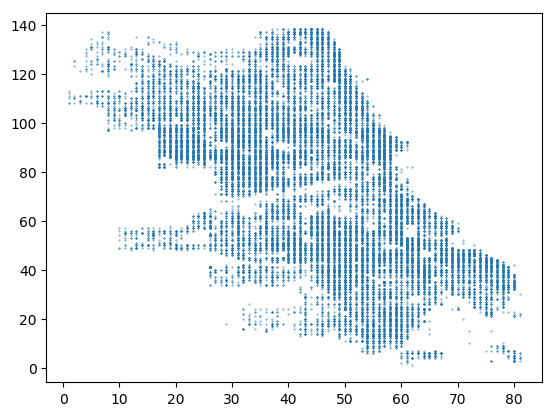

PyObject <matplotlib.collections.PathCollection object at 0x12a195710>

In [11]:
a = Array{Float64,1}(data[:,6])/10000;
b = Array{Float64,1}(data[:,7])/10000;
ind = find((a .> 112) .& (a .< 120.05) .& (b .> 181) .& (b .< 195.05));
a = a[ind]; b = b[ind];
a = floor.(Int,a*10); a = a - minimum(a) + 1;
b = floor.(Int,b*10); b = b - minimum(b) + 1;
scatter(a[1:40000],b[1:40000], s = 0.1)

In [5]:
n1 = maximum(a); n2 = maximum(b); y = zeros(n1,n2);

In [6]:
x = 1:n1; y = 1:n2;
X = repeat(x, inner = length(y))
Y = repeat(y, outer = length(x))
z = zeros(length(X));
for i = 1:length(a)
    ind = (a[i] - 1) * n2 + b[i];
    z[ind] += 1;
end

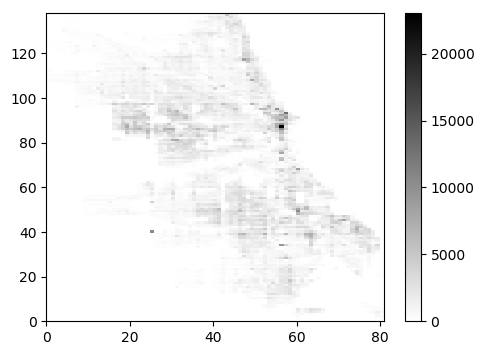

In [34]:
Z = reshape(z,n2,n1);
fig, ax = subplots(figsize = (12,4));
subplot(121)
pcolormesh(Z, cmap = "binary"); colorbar();

In [38]:
g = Grid([n1;n2]; periodic=false);
A = adjacency_matrix(g);
D = -full(incidence_matrix(g, oriented = true))';

In [ ]:
out = BGSM_general(Z[:],D, v0 = 1e-3 * 10, v1 = 1e4, b = sum(size(D)), verbose = true)